In [1]:
import numpy as np

In [45]:
import matplotlib.pyplot as plt

In [5]:
train_data = np.genfromtxt("mnist_train.csv", delimiter=',')
test_data = np.genfromtxt("mnist_test.csv", delimiter=',')
print(train_data.shape)
print(test_data.shape)
N_train = 60000
N_test = 10000
train_labels = train_data[:N_train, 0].astype(int)
train_images = train_data[:N_train, 1:].T/255
test_labels = test_data[:N_test, 0].astype(int)
test_images = test_data[:N_test, 1:].T/255
print(train_labels.shape)
print(train_images.shape)
print(test_labels.shape)
print(test_images.shape)

(60000, 785)
(10000, 785)
(60000,)
(784, 60000)
(10000,)
(784, 10000)


In [6]:
def softmax(x):
    max_elem = np.max(x, axis = 0)
    y = x - max_elem
    y = np.exp(y)
    sums = np.sum(y, axis = 0)
    return y / sums

In [7]:
def one_hot_encoding(y_label):
    C = int(y_label.max() + 1)
    enc = np.zeros((C, y_label.size))
    enc[y_label.astype(int), np.arange(y_label.size)] = 1
    return enc

In [8]:
eps = 1e-10

In [37]:
class NN:
    def __init__(self, sizes):
        self.W0 = np.random.randn(sizes[1], sizes[0])
        self.W1 = np.random.randn(sizes[2], sizes[1])
        self.mW0 = np.zeros_like(self.W0)
        self.mW1 = np.zeros_like(self.W1)
        
    def train(self, X, y_label, epochs = 10, alpha = 0.1, beta = 0.8):
        y_one_hot = one_hot_encoding(y_label)
        for epoch in range(epochs):
            a0 = self.W0 @ X
            z0 = np.maximum(a0, 0)
            a1 = self.W1 @ z0
            y = softmax(a1)
            
            loss = - (np.log(y + eps) * y_one_hot).sum() / y_label.size
            acc = (np.argmax(y, axis = 0) == y_label).sum() / y_label.size
            
            d_a_1 = y - y_one_hot
            gradW1 = d_a_1 @ z0.T
            d_z_0 = self.W1.T @ d_a_1
            d_a_0 = d_z_0.copy()
            d_a_0[a0<0] = 0
            gradW0 = d_a_0 @ X.T
            
            self.mW0 = beta * self.mW0 - alpha * gradW0
            self.mW1 = beta * self.mW1 - alpha * gradW1
            
            self.W0 += self.mW0
            self.W1 += self.mW1
            
            print("loss: ", loss, " acc: ", acc * 100, "%")
            
    def stoch_train(self, X, y_label, epochs = 10, alpha = 0.1, beta = 0.8, mbSize = 100):
        y_one_hot = one_hot_encoding(y_label)
        iters_per_epoch = int(y_label.size / mbSize)
        indices = np.arange(y_label.size)
        for epoch in range(epochs):
            np.random.shuffle(indices)
            X_sh = X[:, indices]
            y_one_sh = y_one_hot[:, indices]
            
            for it in range(iters_per_epoch):
                X_iter = X_sh[:, it*mbSize:(it+1)*mbSize]
                y_one_iter = y_one_sh[:, it*mbSize:(it+1)*mbSize]
                
                
            
                a0 = self.W0 @ X_iter
                z0 = np.maximum(a0, 0)
                a1 = self.W1 @ z0
                y = softmax(a1)


                d_a_1 = y - y_one_iter
                gradW1 = d_a_1 @ z0.T
                d_z_0 = self.W1.T @ d_a_1
                d_a_0 = d_z_0.copy()
                d_a_0[a0<0] = 0
                gradW0 = d_a_0 @ X_iter.T

                self.mW0 = beta * self.mW0 - alpha * gradW0
                self.mW1 = beta * self.mW1 - alpha * gradW1

                self.W0 += self.mW0
                self.W1 += self.mW1
            loss, acc = self.evaluate(X, y_label)
            print("loss: ", loss, " acc: ", acc * 100, "%")
    def evaluate(self, X, y_label):
        y_one_hot = one_hot_encoding(y_label)
        a0 = self.W0 @ X
        z0 = np.maximum(a0, 0)
        a1 = self.W1 @ z0
        y = softmax(a1)
        loss = - (np.log(y + eps) * y_one_hot).sum() / y_label.size
        acc = (np.argmax(y, axis = 0) == y_label).sum() / y_label.size
        return loss, acc
    
        

In [39]:
mnist_net = NN([784, 100, 10])
mnist_net.stoch_train(train_images, train_labels, alpha = 1e-3, epochs = 20, beta = 0.9, mbSize = 100)

loss:  0.4657653353088157  acc:  87.46166666666667 %
loss:  0.31698598067130085  acc:  91.09 %
loss:  0.2647537519580748  acc:  92.7 %
loss:  0.24236248727604887  acc:  93.095 %
loss:  0.22592437371852545  acc:  93.605 %
loss:  0.1957769603226755  acc:  94.33166666666666 %
loss:  0.17627800976755473  acc:  94.86166666666666 %
loss:  0.19334673112742287  acc:  94.43 %
loss:  0.15586374548641027  acc:  95.395 %
loss:  0.14338171362609145  acc:  95.735 %
loss:  0.13733787891028912  acc:  95.89166666666667 %
loss:  0.1238475179450728  acc:  96.45666666666666 %
loss:  0.11226060376212808  acc:  96.655 %
loss:  0.11051801653546481  acc:  96.68166666666667 %
loss:  0.10726496014505131  acc:  96.76833333333333 %
loss:  0.10781744095976004  acc:  96.79333333333334 %
loss:  0.09978594266857592  acc:  96.98666666666666 %
loss:  0.08882856592990553  acc:  97.25666666666667 %
loss:  0.08440826031924936  acc:  97.40833333333333 %
loss:  0.08315824529052832  acc:  97.51333333333334 %


In [40]:
loss, acc = mnist_net.evaluate(test_images, test_labels)
print("loss: ", loss, " acc: ", acc * 100, "%")

loss:  0.24161445193959047  acc:  95.09 %


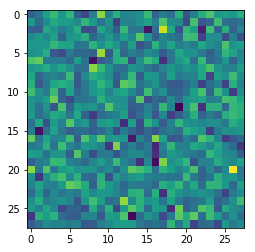

In [47]:
plt.imshow(mnist_net.W0[0].reshape(28, 28))
plt.show()